In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('fake_reg.xlsx')
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


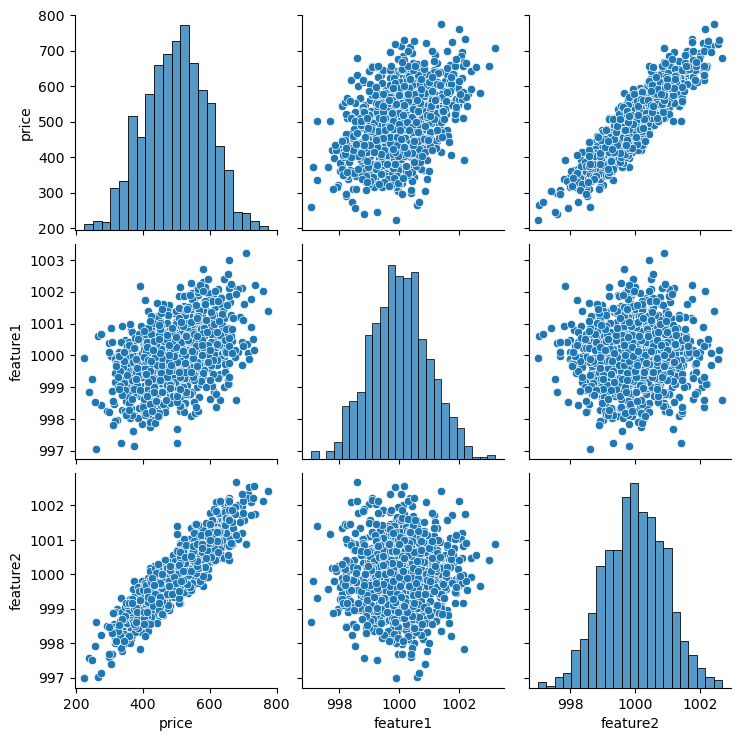

In [4]:
sns.pairplot(data = df)

In [5]:
df.corr()

,price,feature1,feature2
price,1.000000,0.444190,0.907576
feature1,0.444190,1.000000,0.030607
feature2,0.907576,0.030607,1.000000


In [6]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


<AxesSubplot:xlabel='price', ylabel='Count'>

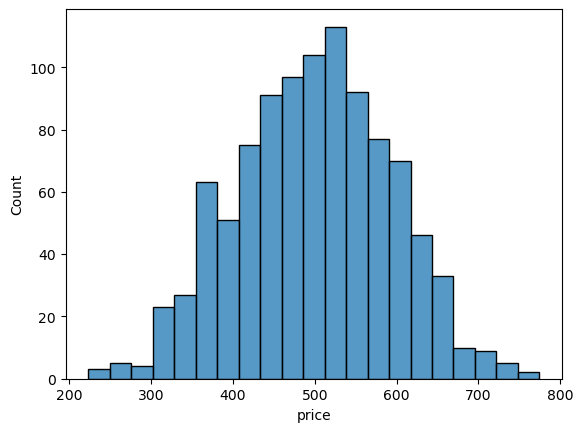

In [7]:
sns.histplot(df['price'])

<AxesSubplot:xlabel='feature1', ylabel='Count'>

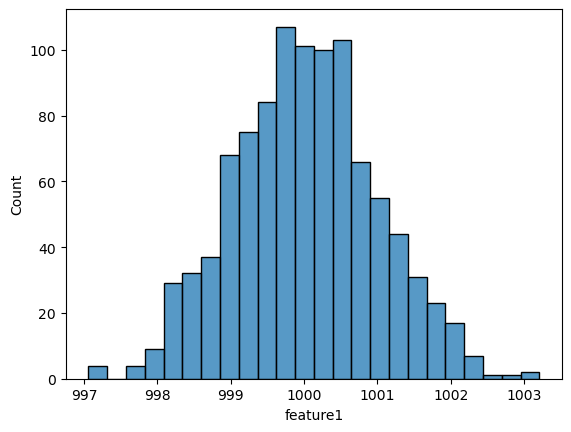

In [8]:
sns.histplot(df['feature1'])

<AxesSubplot:xlabel='feature2', ylabel='Count'>

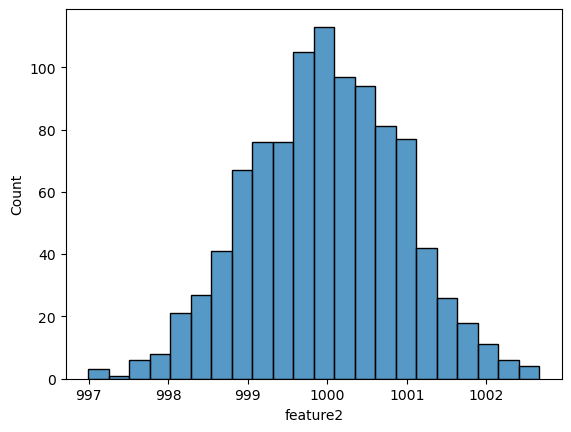

In [9]:
sns.histplot(df['feature2'])

In [10]:
# separate x and y
x = df.iloc[:,1:].values
x

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [11]:
y = df['price'].values
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [13]:
x

array([[-0.23277507, -0.22551032],
       [-1.18389305,  1.12100994],
       [ 0.05762089, -1.19831824],
       ...,
       [ 1.47655837, -1.19452978],
       [ 0.77742953, -1.49494963],
       [-0.80318737,  1.55251439]])

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.3, random_state=1)

### Import the Neural Network Libraries

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scipy.stats.morestats import optimize

### Building the Ann Model.

In [16]:
ann = Sequential() 
ann.add(Dense(units = 4, activation = 'relu')) # hidden Layer 1
ann.add(Dense(units = 4, activation = 'relu')) # hidden Layer 2

ann.add(Dense(units = 1, activation = 'linear')) # output layer
# where activation function is by default set as 'linear'.

ann.compile(optimizer='adam', loss = 'mse')

ann.fit(xtrain,ytrain, epochs = 250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 255579.4219
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 255446.7656
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 255306.0781
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 255156.7969
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 254994.7656
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 254816.4062
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 254611.7969
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 254373.0312
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 254096.4062
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 253775.6406
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 253409.0781
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

22/22 [==============================] - 0s 2ms/step - loss: 63917.5781
Epoch 97/250
22/22 [==============================] - 0s 2ms/step - loss: 61365.5898
Epoch 98/250
22/22 [==============================] - 0s 2ms/step - loss: 58793.8516
Epoch 99/250
22/22 [==============================] - 0s 1ms/step - loss: 56162.5586
Epoch 100/250
22/22 [==============================] - 0s 2ms/step - loss: 53669.9648
Epoch 101/250
22/22 [==============================] - 0s 2ms/step - loss: 51110.4688
Epoch 102/250
22/22 [==============================] - 0s 2ms/step - loss: 48653.6953
Epoch 103/250
22/22 [==============================] - 0s 2ms/step - loss: 46113.7227
Epoch 104/250
22/22 [==============================] - 0s 2ms/step - loss: 43772.3320
Epoch 105/250
22/22 [==============================] - 0s 2ms/step - loss: 41361.8594
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - loss: 39137.4414
Epoch 107/250
22/22 [==============================] - 0s 2ms/step - lo

22/22 [==============================] - 0s 2ms/step - loss: 1199.1445
Epoch 193/250
22/22 [==============================] - 0s 1ms/step - loss: 1187.0457
Epoch 194/250
22/22 [==============================] - 0s 1ms/step - loss: 1175.0541
Epoch 195/250
22/22 [==============================] - 0s 2ms/step - loss: 1163.4453
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 1152.2985
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 1141.0172
Epoch 198/250
22/22 [==============================] - 0s 2ms/step - loss: 1129.8688
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 1118.3732
Epoch 200/250
22/22 [==============================] - 0s 1ms/step - loss: 1107.8890
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 1096.8407
Epoch 202/250
22/22 [==============================] - 0s 2ms/step - loss: 1086.2767
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 1075

In [17]:
model_loss = ann.history.history
model_loss

{'loss': [255579.421875,
  255446.765625,
  255306.078125,
  255156.796875,
  254994.765625,
  254816.40625,
  254611.796875,
  254373.03125,
  254096.40625,
  253775.640625,
  253409.078125,
  252987.953125,
  252508.578125,
  251962.609375,
  251348.703125,
  250665.046875,
  249909.921875,
  249084.84375,
  248175.84375,
  247192.140625,
  246116.75,
  244975.15625,
  243720.390625,
  242392.890625,
  240973.96875,
  239458.921875,
  237865.46875,
  236178.96875,
  234399.0625,
  232542.875,
  230588.5,
  228556.65625,
  226443.765625,
  224237.46875,
  221970.53125,
  219624.640625,
  217210.328125,
  214725.59375,
  212183.859375,
  209577.8125,
  206925.390625,
  204228.046875,
  201465.71875,
  198684.40625,
  195876.15625,
  193029.078125,
  190149.640625,
  187289.125,
  184382.90625,
  181486.703125,
  178607.765625,
  175725.96875,
  172850.28125,
  169993.671875,
  167149.671875,
  164342.84375,
  161539.4375,
  158783.0,
  156052.65625,
  153334.671875,
  150696.890625,
  

In [18]:
df_loss = pd.DataFrame(model_loss)
df_loss

,loss
0,255579.421875
1,255446.765625
2,255306.078125
3,255156.796875
4,254994.765625
...,...
245,654.752991
246,646.427917
247,637.539673
248,628.727905


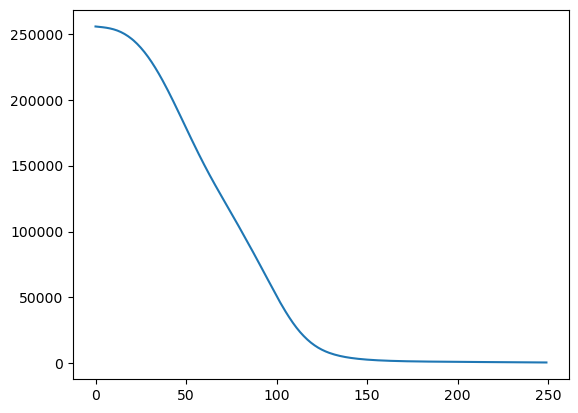

In [19]:
plt.plot(df_loss['loss'])

In [21]:
ypred = ann.predict(xtest)

10/10 [==============================] - 0s 1ms/step


In [22]:
ypred

array([[475.84778],
       [523.6582 ],
       [491.25684],
       [534.83026],
       [667.9842 ],
       [336.1011 ],
       [458.27887],
       [365.49658],
       [731.77045],
       [498.00516],
       [473.01056],
       [503.74042],
       [491.59702],
       [349.37222],
       [547.4017 ],
       [494.91925],
       [577.3505 ],
       [548.49915],
       [477.6761 ],
       [497.3683 ],
       [452.3239 ],
       [604.8344 ],
       [431.52765],
       [586.18835],
       [415.41656],
       [519.0619 ],
       [378.557  ],
       [504.7412 ],
       [542.9572 ],
       [383.8152 ],
       [430.71698],
       [643.85724],
       [560.1328 ],
       [536.3317 ],
       [612.52716],
       [549.51715],
       [388.3685 ],
       [574.6445 ],
       [552.1065 ],
       [518.4854 ],
       [416.6889 ],
       [739.03046],
       [522.1567 ],
       [530.2898 ],
       [513.2464 ],
       [460.4136 ],
       [524.5033 ],
       [530.7762 ],
       [591.0645 ],
       [459.82315],


In [23]:
# the reason behind using flatten is yped is 2d array
# flatten cahnges 2d array to 1d array.

In [24]:
pd.DataFrame({'Actual value': ytest, 'Predicted value': ypred.flatten()})

,Actual value,Predicted value
0,489.057552,475.847778
1,526.210746,523.658203
2,518.360395,491.256836
3,552.778935,534.830261
4,649.395917,667.984192
...,...,...
295,530.276259,535.962708
296,481.645813,468.779785
297,460.694781,459.689667
298,518.263124,513.792725


### Model Evaluation

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(ytest,ypred)

0.9265010720289342

### Model forecasting

In [27]:
newdata = [[900,950]]
nd = sc.fit_transform(newdata)
ann.predict(nd)

1/1 [==============================] - 0s 25ms/step


array([[490.80902]], dtype=float32)

In [28]:
newdata = [[900,950]]
nd = sc.fit_transform(newdata)
ann.predict(nd)[0]

1/1 [==============================] - 0s 22ms/step


array([490.80902], dtype=float32)